### House Price Prediction

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

### 1. Data preprocessing and exploratory data analysis (EDA)

#### Load Dataset

In [2]:
#Load the dataset
df = pd.read_csv("../datasets\Housing.csv")

<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7744\1469306373.py:2: SyntaxWarning: invalid escape sequence '\H'
  df = pd.read_csv("../datasets\Housing.csv")


In [3]:
#top first five datasets
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
#Total rows and columns
df.shape

(545, 13)

In [5]:
#basic statistical analysis
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
#overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
#check columns names
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

#### Handle Missing Values

In [8]:
#checking for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
# input data
X = df.drop(columns=["price"])

# target data
y = df["price"]

#### Encode Categorical Variables

In [10]:
# Identify categorical and numerical columns
# categorical_cols = df.select_dtypes(include=['object']).columns
categorical_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", 
                    "airconditioning", "prefarea", "furnishingstatus"]
print(f"categorical_cols: {categorical_columns}")

# numerical_cols = df.select_dtypes(include=['int64', 'float]).columns
numerical_columns = ["area", "bedrooms", "bathrooms", "stories", "parking"]
print(f"numerical_cols: {numerical_columns}")

categorical_cols: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_cols: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [11]:
# Apply One-Hot Encoding 
# encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoder = OneHotEncoder(handle_unknown='ignore')

# fit the data for encoding
encoded_cat_data = encoder.fit_transform(X[categorical_columns]).toarray()
encoded_col_names = encoder.get_feature_names_out(categorical_columns)

# convert encoded categorical data to dataframe
encoded_X = pd.DataFrame(encoded_cat_data, columns=encoded_col_names)
encoded_X.head()

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [12]:
# concatinate the numerical and categorical columns
X_final = pd.concat([X[numerical_columns], encoded_X], axis=1)
X_final.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,8960,4,4,4,3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,9960,3,2,2,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,7500,4,2,2,3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,7420,4,1,2,2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [13]:
X_final.shape

(545, 20)

In [14]:
#Visualize the Correlation Matrix using a Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'yes'

<Figure size 1000x800 with 0 Axes>

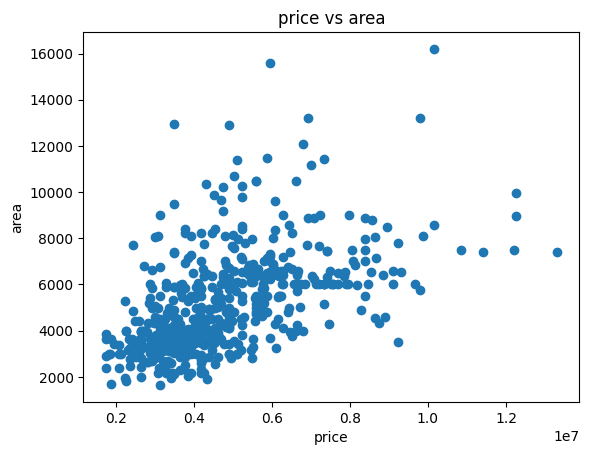

In [15]:
#Scatter plot for actual vs predicted prices
plt.scatter(df['price'], df['area'])
plt.xlabel('price')
plt.ylabel('area')
plt.title('price vs area')
plt.show()

### 2. Train-Test Split

In [16]:
from sklearn.model_selection import train_test_split

#Define features (X) and target (y)
# X = pd.concat([df[numerical_columns], encoded_cats_data], axis=1)
# X = pd.concat([df[numerical_columns].drop(columns=['price'], errors='ignore'), encoded_cats_data], axis=1)
# y = df['price']


In [17]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

#### Scale Numerical Features

In [18]:
#Initialize the scaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


### 3. Train the Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression

#Initialize the model
model = LinearRegression()
#Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

### 4. Model Prediction

In [20]:
#Predict house prices on the test data
#y_pred = model.predict(X_test)

# Display the first few predicted values
#print(y_pred[:2])
#print(y_pred)

### 5. Model Evaluation

In [21]:
# make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:,.2f}")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"Root Mean Squared Error: {rmse:,.2f}")
print(f"R-squared: {r2:,.4f}")


Mean Absolute Error: 970,043.40
Mean Squared Error: 1,754,318,687,330.66
Root Mean Squared Error: 1,324,506.96
R-squared: 0.6529


### 6. Visualizing (Actual vs Predicted Prices)

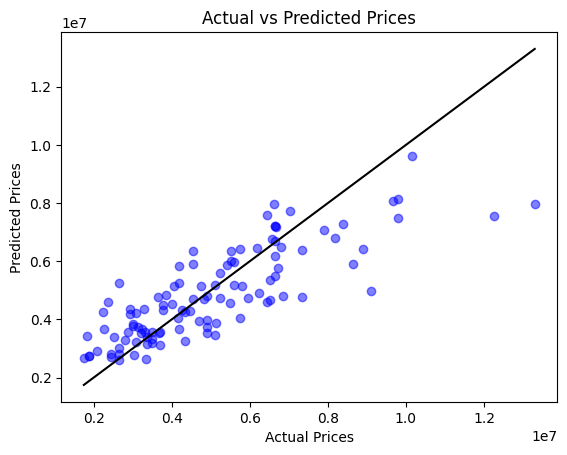

In [22]:
#Scatter plot for actual vs predicted prices
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

### save model

In [23]:
import joblib

joblib.dump(model, "C:/Users/Lenovo/house-price-prediction/notebook/house_pred.pkl")
joblib.dump(encoder, "C:/Users/Lenovo/house-price-prediction/notebook/onehot_encoder.pkl")

print("Model saved successfully.")

Model saved successfully.


In [25]:
model_path = r"C:/Users/Lenovo/house-price-prediction/notebook/house_pred.pkl"
encoder_path = r"C:/Users/Lenovo/house-price-prediction/notebook/onehot_encoder.pkl"

model = joblib.load(model_path)
encoder = joblib.load(encoder_path)

print("Model saved successfully.")
# create a new sample data
# New house input data
new_house = pd.DataFrame([{
    "area": 5000,
    "bedrooms": 3,
    "bathrooms": 2,
    "stories": 2,
    "parking": 1,
    "mainroad": "yes",
    "guestroom": "no",
    "basement": "no",
    "hotwaterheating": "no",
    "airconditioning": "yes",
    "prefarea": "yes",
    "furnishingstatus": "semi-furnished"
}])

# preprocess new data
categorical_cols = new_house.select_dtypes(include=['object']).columns
new_house_cat = encoder.transform(new_house[categorical_cols]).toarray()
new_house_cat_df = pd.DataFrame(new_house_cat, columns=encoder.get_feature_names_out(categorical_cols))

new_house_final = pd.concat([new_house[numerical_columns], new_house_cat_df], axis=1)

# make prediction
new_house_price = model.predict(new_house_final)
print(f"Predicted house price: ${new_house_price[0]:,.2f}")

Model saved successfully.
Predicted house price: $6,561,252.59
